In [222]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

script_directory = os.path.abspath(os.path.join('..', 'evaluation'))
sys.path.append(script_directory)

from prediction_reader import score_result

In [223]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location, save_figure=None):
    

    plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

    plt.figure(figsize=(12, 6))

    colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']

    # Set the width of each box
    box_width = 0.2


    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor=colour_scheme[i])
        medianprops = dict(linestyle='--', linewidth=1, color='none')
        meanprops = dict(linestyle='-', linewidth=1, color='black')

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)
    
    # plt.ylim(-0.005, 0.9)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        plt.legend(loc=location)

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.eps', format='eps')

    
    plt.show()


In [224]:
# Validity plot
data1 = [0.9875, 0.984375, 0.996875, 0.959375, 1.0]
data2 = [0.984375, 0.971875, 0.984375, 0.953125, 0.9826086956521739]
data3 = [0.94375, 0.915625, 0.91875, 0.978125, 1.0]

base_mmp = [0.803125, 0.721875, 0.740625, 0.66875, 0.808695652173913]
aug_mmp = [0.90625, 0.86875, 0.8375, 0.81875, 0.8391304347826087]
comb_mmp = [0.946875, 0.928125, 0.915625, 0.871875, 0.9043478260869565]
mask_mmp = None

base_chemf_mmp = [0.9815789473684211, 0.9736842105263158, 0.9631578947368421, 0.9864864864864865]
aug_chemf_mmp = [0.9947368421052631, 0.9842105263157894, 0.968421052631579, 0.9756756756756757]
comb_chemf_mmp = [0.9894736842105263, 0.9868421052631579, 0.9763157894736842, 0.9864864864864865]
mask_chemf_mmp = [0.9921052631578947, 0.95, 0.9763157894736842, 0.9891891891891892]

chemf_comb = [0.94375, 0.915625, 0.91875, 0.978125, 1.0]

comb = [comb_chemf_mmp, comb_mmp, chemf_comb]

aug = [aug_chemf_mmp, aug_mmp]

base = [base_chemf_mmp, base_mmp]

mask = [mask_chemf_mmp]

data = [comb]

xlabel = None
ylabel = 'Validity'
xticks = ['ChemVA comb', 'VA comb', 'Chemf.']
labels = ['comb', 'rand', 'base', 'mask']

# multi_boxplot(data, xlabel, ylabel, xticks, labels, None)

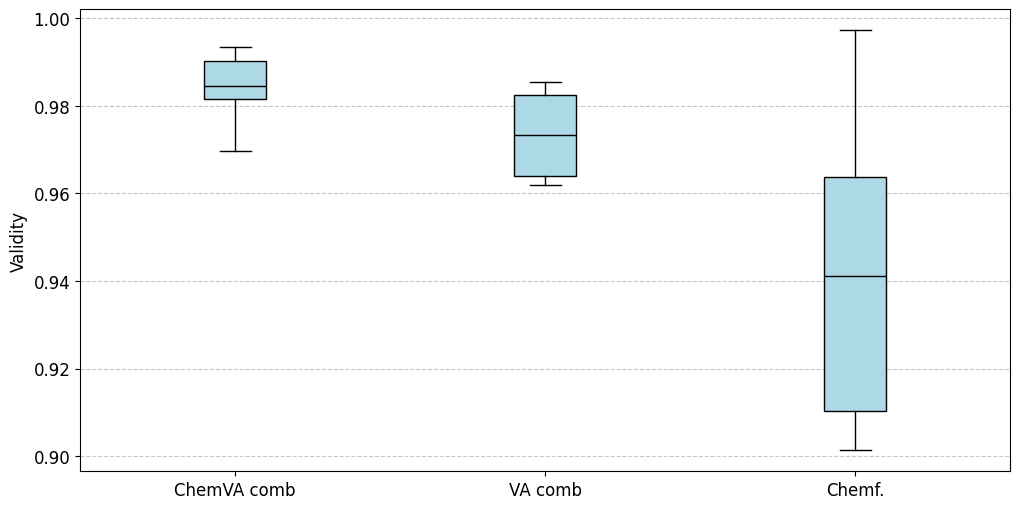

In [225]:
# Validity plot
VA_base = [0.9, 0.8526315789473684, 0.8605263157894737, 0.8810810810810811]
VA_rand = [0.9736842105263158, 0.9407894736842105, 0.9289473684210526, 0.9324324324324325]
VA_comb = [0.9855263157894737, 0.9815789473684211, 0.9618421052631579, 0.9648648648648649]
VA_mask = [0.9381578947368421, 0.9092105263157895, 0.881578947368421, 0.8689189189189189]

chemVA_base = [0.9644736842105263, 0.9407894736842105, 0.9631578947368421, 0.9689189189189189]
chemVA_rand = [0.9947368421052631, 0.9960526315789474, 0.9736842105263158, 0.9864864864864865]
chemVA_comb = [0.993421052631579, 0.9855263157894737, 0.9697368421052631, 0.9891891891891892]
chemVA_mask = [0.9881578947368421, 0.9697368421052631, 0.9736842105263158, 0.9932432432432432]

chemf_comb = [0.9131578947368421, 0.9013157894736842, 0.9526315789473684, 0.9972972972972973]

comb = [chemVA_comb, VA_comb, chemf_comb]

rand = [chemVA_rand, VA_rand]

base = [chemVA_base, VA_base]

mask = [chemVA_mask, VA_mask]

data = [comb]

xlabel = None
ylabel = 'Validity'
xticks = ['ChemVA comb', 'VA comb', 'Chemf.']
labels = ['comb', 'rand', 'base', 'mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, None)

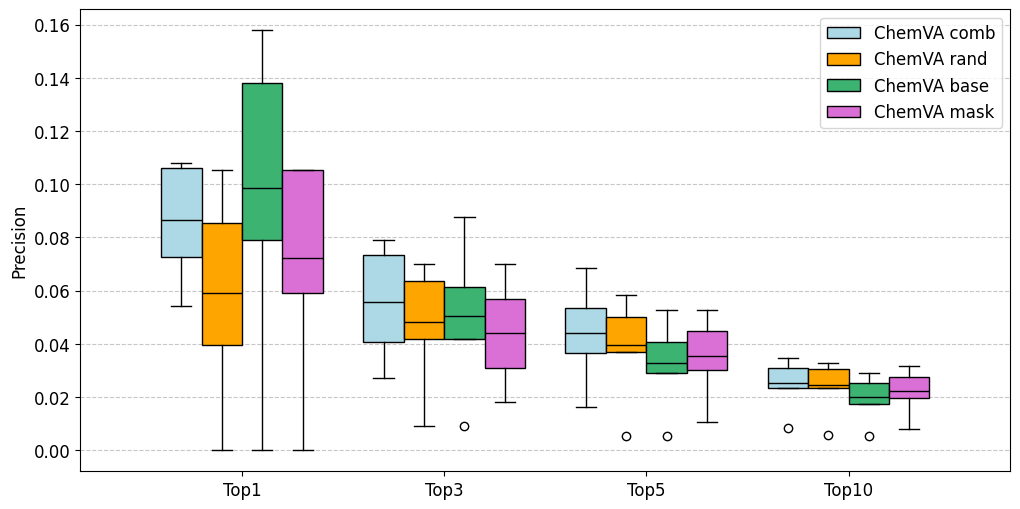

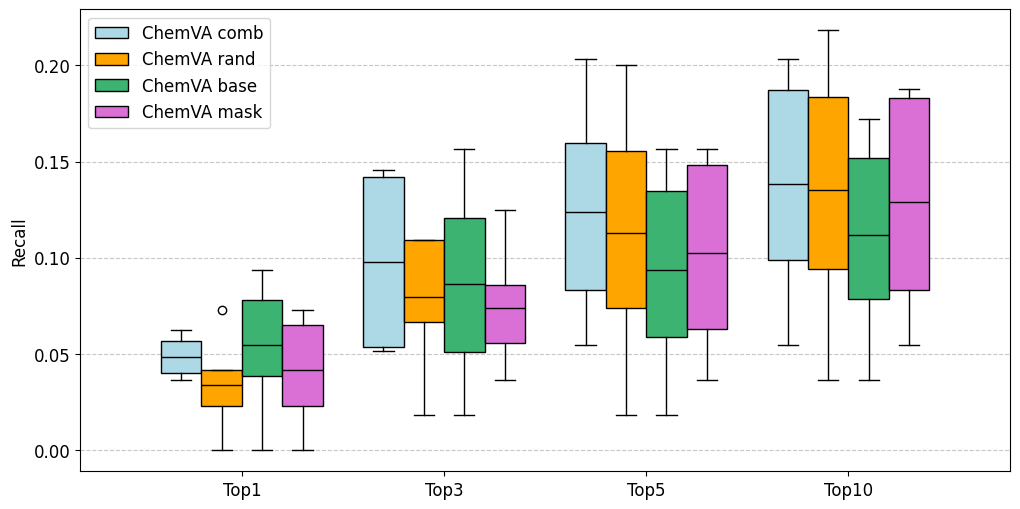

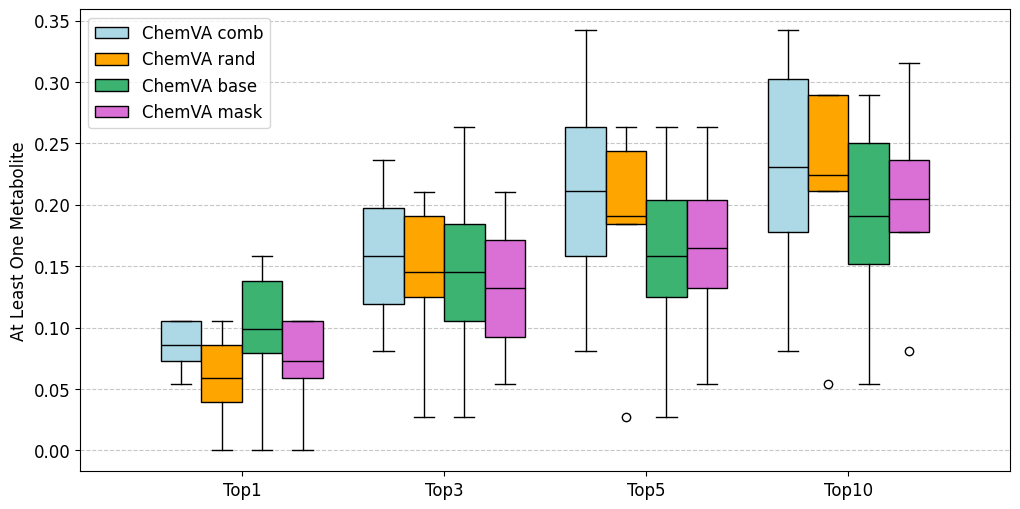

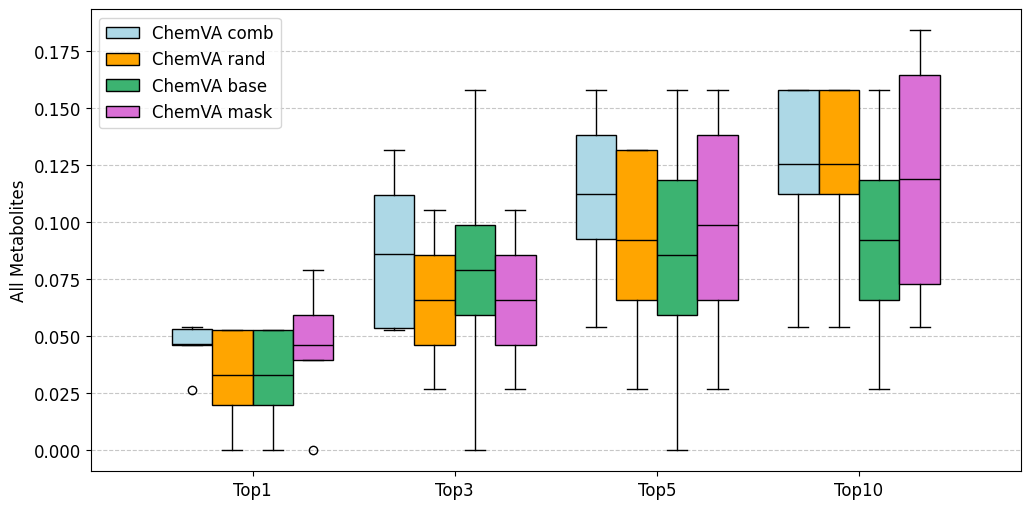

In [226]:
bs = 4

recall_comb, precision_comb, score1_comb, score_all_comb = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_chemVA_comb.csv', bs, False)
recall_rand, precision_rand, score1_rand, score_all_rand = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_chemVA_rand.csv', bs, False)
recall_base, precision_base, score1_base, score_all_base = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_chemVA_base.csv', bs, False)
recall_mask, precision_mask, score1_mask, score_all_mask = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_chemVA_mask.csv', bs, False)

data = [precision_comb, precision_rand, precision_base, precision_mask]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right')

data = [recall_comb, recall_rand, recall_base, recall_mask]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score1_comb[0:4], score1_rand[0:4], score1_base[0:4], score1_mask[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score_all_comb[0:4], score_all_rand[0:4], score_all_base[0:4], score_all_mask[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

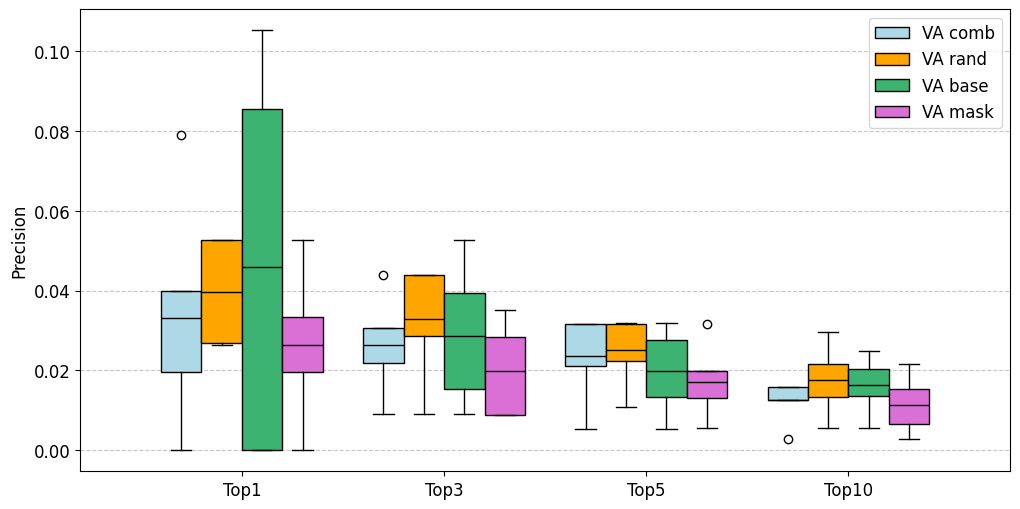

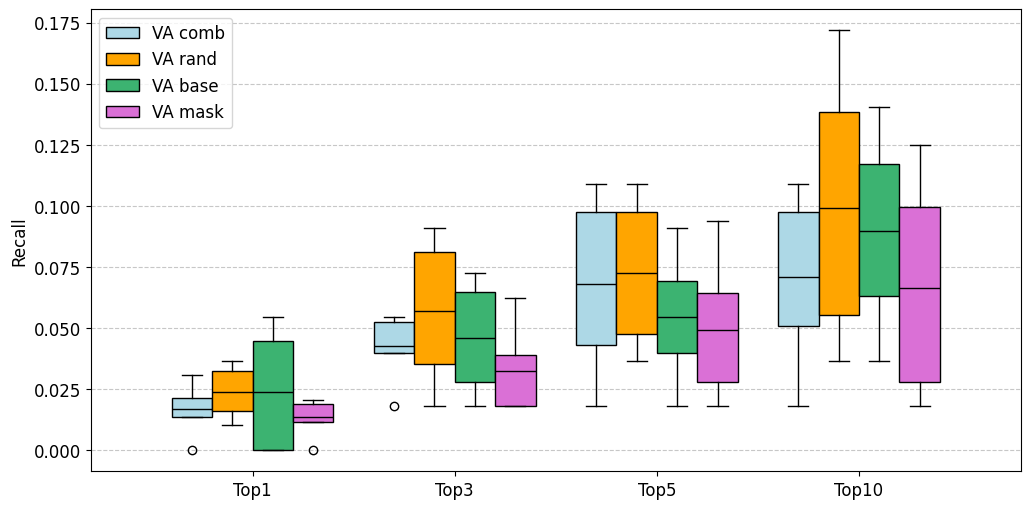

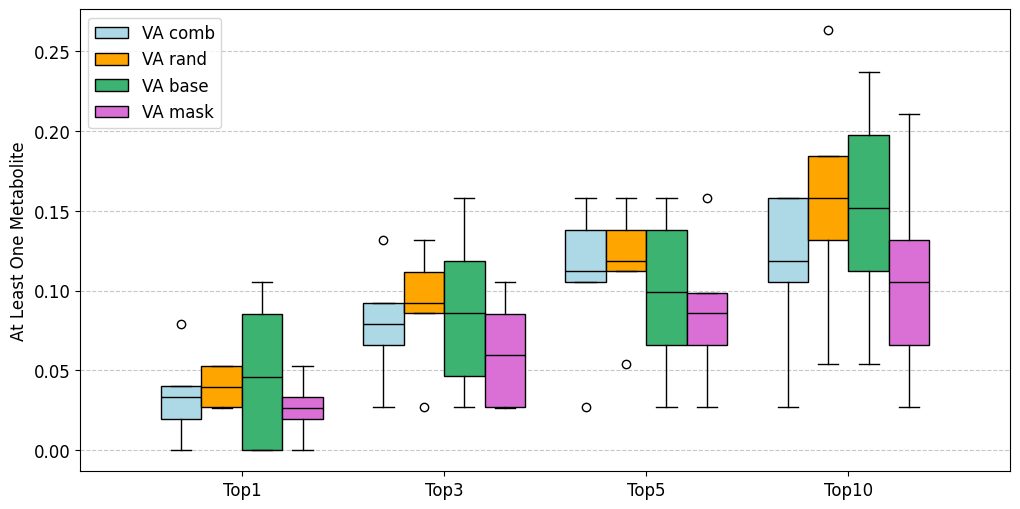

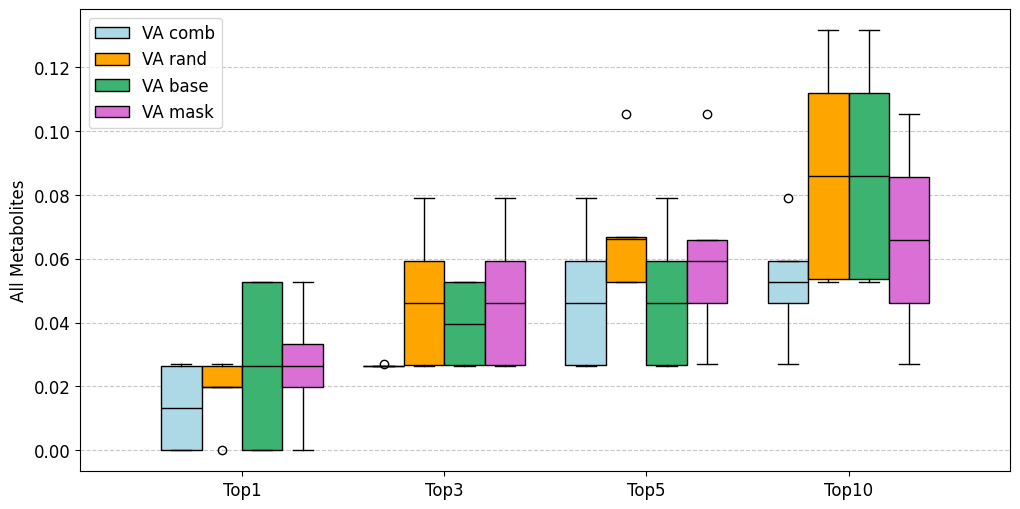

In [227]:
bs = 4

recall_comb, precision_comb, score1_comb, score_all_comb = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_VA_comb.csv', bs, False)
recall_rand, precision_rand, score1_rand, score_all_rand = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_VA_rand.csv', bs, False)
recall_base, precision_base, score1_base, score_all_base = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_VA_base.csv', bs, False)
recall_mask, precision_mask, score1_mask, score_all_mask = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_VA_mask.csv', bs, False)

data = [precision_comb, precision_rand, precision_base, precision_mask]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right')

data = [recall_comb, recall_rand, recall_base, recall_mask]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score1_comb[0:4], score1_rand[0:4], score1_base[0:4], score1_mask[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score_all_comb[0:4], score_all_rand[0:4], score_all_base[0:4], score_all_mask[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

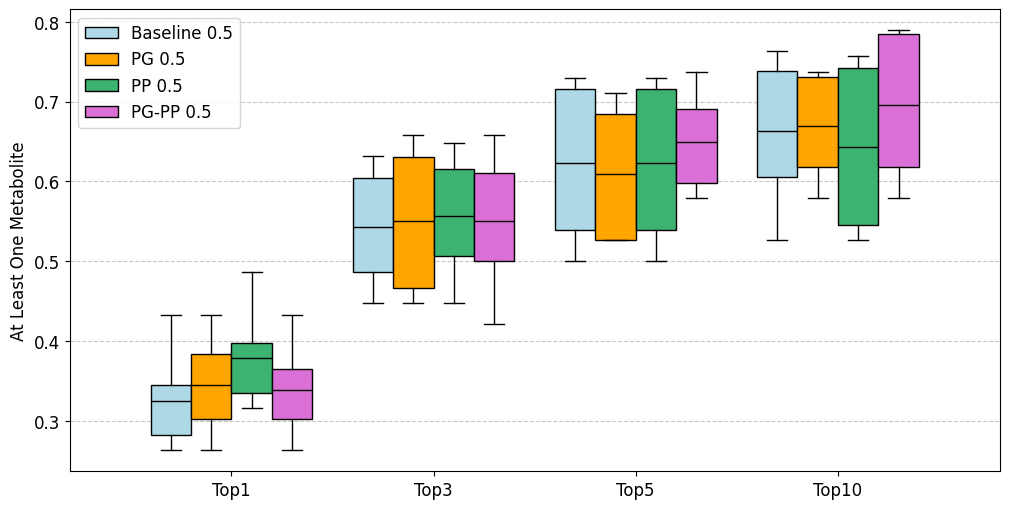

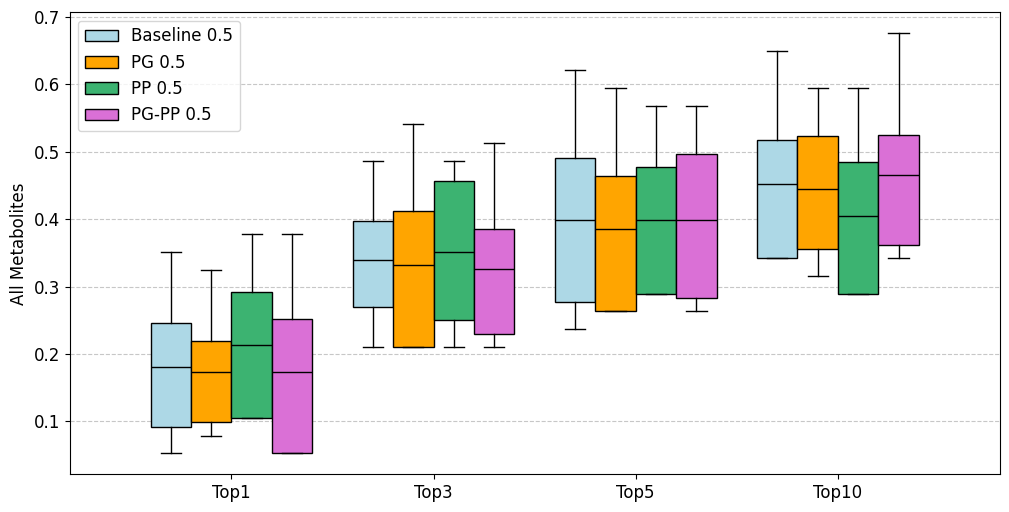

In [228]:
bs = 4

recall_baseline_05, precision_baseline_05, score1_baseline_05, score_all_baseline_05 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_baseline_0.5.csv', bs, False)
recall_PG, precision_PG, score1_PG, score_all_PG = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_PG_0.5.csv', bs, False)
recall_PP, precision_PP, score1_PP, score_all_PP = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_PP_0.5.csv', bs, False)
recall_PG_PP, precision_PG_PP, score1_PG_PP, score_all_PG_PP = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_PG-PP_0.5.csv', bs, False)

data = [score1_baseline_05[0:4], score1_PG[0:4], score1_PP[0:4], score1_PG_PP[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline 0.5', 'PG 0.5', 'PP 0.5', 'PG-PP 0.5']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score_all_baseline_05[0:4], score_all_PG[0:4], score_all_PP[0:4], score_all_PG_PP[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline 0.5', 'PG 0.5', 'PP 0.5', 'PG-PP 0.5']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

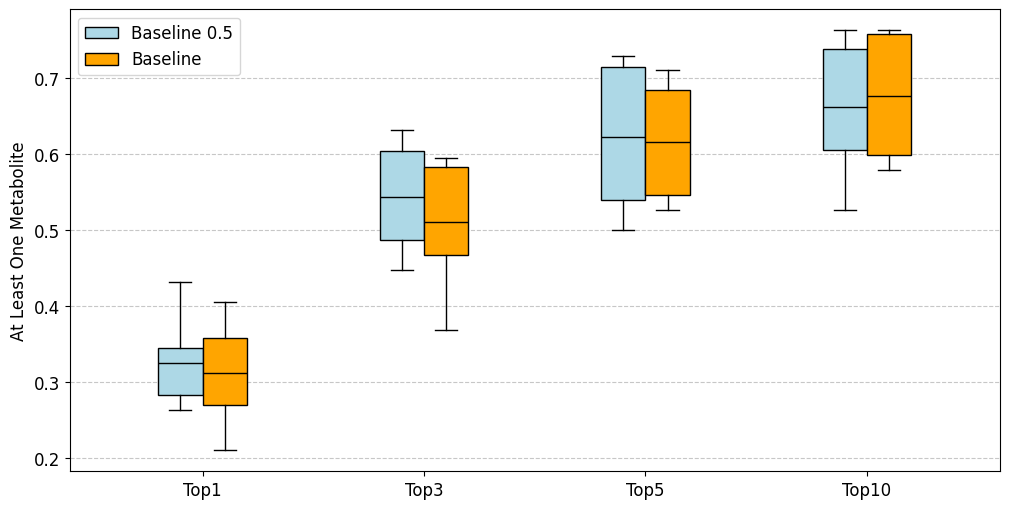

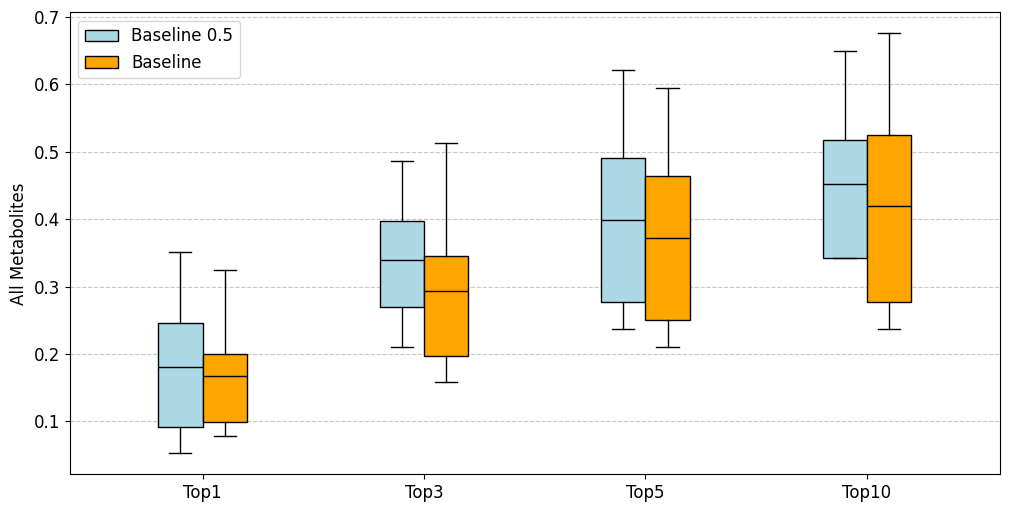

In [229]:
bs = 4

recall_baseline_05, precision_baseline_05, score1_baseline_05, score_all_baseline_05 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_baseline_0.5.csv', bs, False)
recall_baseline, precision_baseline, score1_baseline, score_all_baseline = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_baseline.csv', bs, False)

data = [score1_baseline_05[0:4], score1_baseline[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline 0.5', 'Baseline']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score_all_baseline_05[0:4], score_all_baseline[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline 0.5', 'Baseline']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

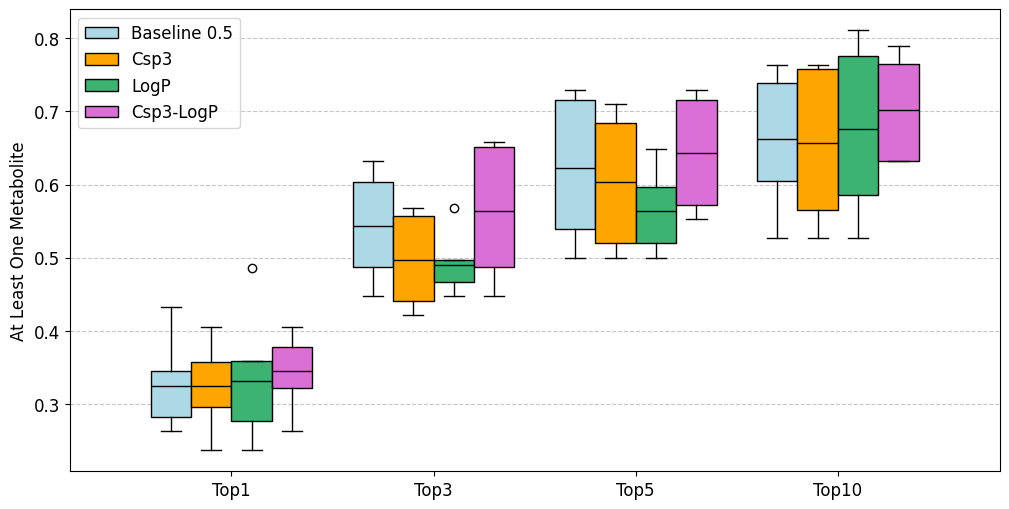

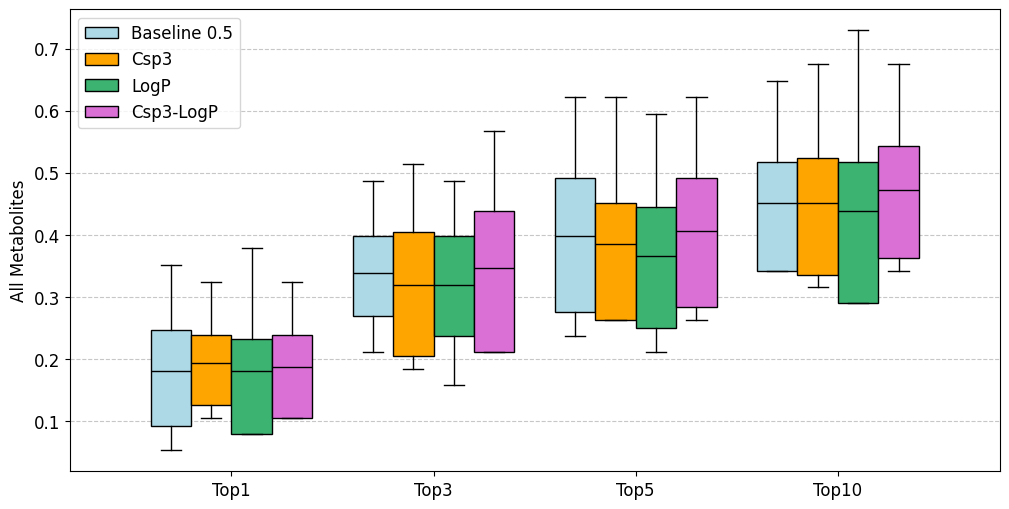

In [230]:
bs = 4

recall_baseline_05, precision_baseline_05, score1_baseline_05, score_all_baseline_05 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_baseline_0.5.csv', bs, False)
recall_csp3, precision_csp3, score1_csp3, score_all_csp3 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_csp3.csv', bs, False)
recall_logp, precision_logp, score1_logp, score_all_logp = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_logp.csv', bs, False)
recall_csp3_logp, precision_csp3_logp, score1_csp3_logp, score_all_csp3_logp = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/final/result_csp3_logp.csv', bs, False)

data = [score1_baseline_05[0:4], score1_csp3[0:4], score1_logp[0:4], score1_csp3_logp[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline 0.5', 'Csp3', 'LogP', 'Csp3-LogP']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

data = [score_all_baseline_05[0:4], score_all_csp3[0:4], score_all_logp[0:4], score_all_csp3_logp[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline 0.5', 'Csp3', 'LogP', 'Csp3-LogP']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

In [231]:
bs = 5

recall_e1, precision_e1, score1_e1, score_all_e1 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split1_v0_mc_aug_10.csv', bs, False)
recall_e2, precision_e2, score1_e2, score_all_e2 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split2_v0_mc_aug_10.csv', bs, False)
recall_e3, precision_e3, score1_e3, score_all_e3 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split3_v0_mc_aug_10.csv', bs, False)
recall_e4, precision_e4, score1_e4, score_all_e4 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/ensemble/result_split4_v0_mc_aug_10.csv', bs, False)

data = [score_all_e1, score_all_e2, score_all_e3, score_all_e4]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Split 1', 'Split 2', 'Split 3', 'Split 4']

# multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

In [232]:
_, _, bs32_one, bs32_all = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version44_chemf_mmp_comb_0.5.csv', 5, False)
recall_bs19, precision_bs19, score1_bs19, score_all_bs19 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_test_bs19.csv', 8, False)
recall_bs38, precision_bs38, score1_bs38, score_all_bs38 = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_test_bs38.csv', 4, False)

data = [score_all_bs19, score_all_bs38, bs32_all]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['BS 19', 'BS 38', 'BS 32']

# multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')